<a href="https://colab.research.google.com/github/OlenaZ-Dev/sms-spam-detector/blob/main/sms_spam_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install required libraries (if not already installed)
!pip -q install scikit-learn pandas joblib

# Import libraries
import pandas
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import joblib


# Load SMS spam dataset from an open-source repository
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
sms_dataset = pandas.read_csv(url, sep = '\t', header = None, names = ['label', 'text'])


# Split data into training (80%) and test (20%) sets, keeping class balance
X_train, X_test, y_train, y_test = train_test_split(sms_dataset['text'], sms_dataset['label'], test_size = 0.2, stratify = sms_dataset['label'], random_state = 42)

# Create a pipeline:
# 1. TfidfVectorizer - convert text into numerical features
# 2. LogisticRegression - classify messages as spam or ham
pipe = Pipeline([('tfidf', TfidfVectorizer(ngram_range = (1,2), min_df = 2, max_df = 0.9)), ('clf', LogisticRegression(max_iter = 1000))])


# Train the model on the training data
pipe.fit(X_train, y_train)


# Predict on the test data
y_pred = pipe.predict(X_test)


# Print evaluation metrics and confusion matrix
print(classification_report(y_test, y_pred))
print("Confusion matrix \n", confusion_matrix(y_test, y_pred))


# Test the model on new custom examples
examples = [
    "FREE entry in 2 a wkly comp to win FA Cup final tickets! Text FA to 12345",
    "Hey, are we still on for lunch today?",
    "Congratulations! You've won a $1000 Walmart gift card. Click here!"
]

print("\n Predictions on examples:")

for exampl in examples:
  print(f"{exampl} -> {pipe.predict([exampl])[0]}")


# Save the trained model for future use
joblib.dump(pipe, 'text_tfidf_logreg.joblib')


              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Confusion matrix 
 [[966   0]
 [ 32 117]]

 Predictions on examples:
FREE entry in 2 a wkly comp to win FA Cup final tickets! Text FA to 12345 -> spam
Hey, are we still on for lunch today? -> ham
Congratulations! You've won a $1000 Walmart gift card. Click here! -> ham


['text_tfidf_logreg.joblib']

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...



 Shape: (5572, 2)

 Class distribution:
label
ham     4825
spam     747
Name: count, dtype: int64

 Missing values per column:
label    0
text     0
dtype: int64

 Dropped duplicates: 403

 Length stats by class:
             mean    50%   min    max
label                                
ham     70.905890   53.0   2.0  910.0
spam   137.704441  148.0  13.0  223.0


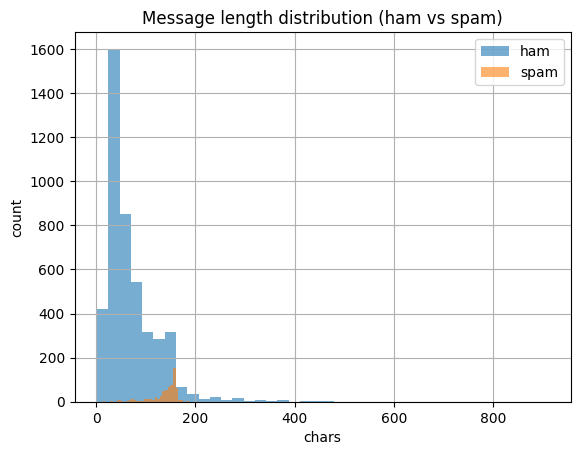

In [3]:
import pandas
from matplotlib import pyplot

# Peek at data
display(sms_dataset.head(10))

# Basic info
print("\n Shape:", sms_dataset.shape)
print("\n Class distribution:")
print(sms_dataset['label'].value_counts())

# Check missing / empty
print("\n Missing values per column:")
print(sms_dataset.isna().sum())

# Remove duplicates (optional, for cleanliness)
before = len(sms_dataset)
sms_dataset = sms_dataset.drop_duplicates(subset=['text']).reset_index(drop=True)
after = len(sms_dataset)
print(f"\n Dropped duplicates: {before - after}")

# Message length stats
sms_dataset['text_len'] = sms_dataset['text'].astype(str).apply(len)
print("\n Length stats by class:")
print(sms_dataset.groupby('label')['text_len'].describe()[['mean','50%','min','max']])

# Simple histogram of message lengths
pyplot.figure()
sms_dataset[sms_dataset['label']=='ham']['text_len'].hist(alpha=0.6, bins=40)
sms_dataset[sms_dataset['label']=='spam']['text_len'].hist(alpha=0.6, bins=40)
pyplot.title("Message length distribution (ham vs spam)")
pyplot.xlabel("chars")
pyplot.ylabel("count")
pyplot.legend(['ham','spam'])
pyplot.show()



In [4]:
import re
import string

def basic_clean(text: str) -> str:
    if not isinstance(text, str):
        text = str(text)
    text = text.lower()
    # replace URLs and numbers with tokens (keeps structure without overfitting to specific values)
    text = re.sub(r"http\S+|www\S+", " URL ", text)
    text = re.sub(r"\d+", " NUM ", text)
    # remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # collapse spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text

sms_dataset['text_clean'] = sms_dataset['text'].apply(basic_clean)
display(sms_dataset[['label','text','text_clean']].head(10))

,label,text,text_clean
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in NUM a wkly comp to win fa cup fi...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey there darling its been NUM weeks n...
6,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...
7,ham,As per your request 'Melle Melle (Oru Minnamin...,as per your request melle melle oru minnaminun...
8,spam,WINNER!! As a valued network customer you have...,winner as a valued network customer you have b...
9,spam,Had your mobile 11 months or more? U R entitle...,had your mobile NUM months or more u r entitle...


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib

X_train, X_test, y_train, y_test = train_test_split(
    sms_dataset['text'],  # raw text; cleaning will be applied inside vectorizer
    sms_dataset['label'],
    test_size=0.2,
    stratify=sms_dataset['label'],
    random_state=42
)

pipeline_clean = Pipeline([("tfidf", TfidfVectorizer(preprocessor = basic_clean, ngram_range = (1, 2), min_df=2, max_df=0.9)), ("clf", LogisticRegression(max_iter=1000))])

pipeline_clean.fit(X_train, y_train)

y_pred = pipeline_clean.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

joblib.dump(pipeline_clean, "text_tfidf_logreg_clean.joblib")

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       903
        spam       0.98      0.83      0.90       131

    accuracy                           0.98      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.98      0.98      0.98      1034

Confusion matrix:
 [[901   2]
 [ 22 109]]


['text_tfidf_logreg_clean.joblib']

In [9]:
import numpy

# Extract the trained TF-IDF vectorizer from the pipeline
vectorizer = pipeline_clean.named_steps["tfidf"]


# Extract the trained Logistic Regression classifier from the pipeline
clf = pipeline_clean.named_steps["clf"]

# Get the feature names (words/phrases) from the TF-IDF vectorizer
feature_names = numpy.array(vectorizer.get_feature_names_out())

# Retrieve model coefficients for each feature
coefs = clf.coef_[0]

# Top features for spam (highest positive weights)
top_spam_idx = numpy.argsort(coefs)[-20:][::-1]

# Top features for ham (most negative weights)
top_ham_idx = numpy.argsort(coefs)[:20]

# Display top spam indicators
print("\nTop spam indicators:")
for i in top_spam_idx:
    print(f"{feature_names[i]:<25} {coefs[i]:.3f}")

# Display top ham indicators
print("\nTop ham indicators:")
for i in top_ham_idx:
    print(f"{feature_names[i]:<25} {coefs[i]:.3f}")


Top spam indicators:
NUM                       8.261
URL                       3.199
call NUM                  3.177
free                      3.161
your                      2.882
call                      2.853
to NUM                    2.831
text                      2.808
to                        2.727
mobile                    2.344
reply                     2.277
txt                       2.207
NUM NUM                   2.122
stop                      2.096
for                       2.024
from                      1.585
new                       1.521
claim                     1.505
you have                  1.486
service                   1.445

Top ham indicators:
my                        -1.620
me                        -1.534
ltgt                      -1.489
im                        -1.061
at                        -1.051
that                      -1.044
ok                        -1.016
but                       -0.872
then                      -0.856
come                